# Курсовая работа 

## Леонов Христофор ПМ22-4

## _Тема: Машинное обучение в задачах машинного перевода_

### Цель курсовой работы:

Исследование и разработка модели машинного перевода с использованием рекуррентных нейронных сетей для автоматического перевода текстов с английского языка на русский.

### Актуальность:

С развитием интернет-технологий и глобализации, задача автоматического машинного перевода становится все более важной. Многие компании и организации сталкиваются с необходимостью перевода больших объемов текста на различные языки для обеспечения коммуникации с клиентами, партнерами и коллегами по всему миру. Кроме того, автоматический машинный перевод может быть полезен в сфере образования, научных исследований, медицинских исследований и других областях,поскольку позволяет сократить время и усилия, затрачиваемые на перевод текстов, и обеспечивает более точные и качественные результаты.


Для решения этой задачи в работе будет использоваться модель машинного перевода с использованием рекуррентных нейронных сетей (RNN) и механизма внимания (attention mechanism), известная как "Sequence-to-Sequence модель с механизмом внимания" или "Seq2Seq модель с attention".При обучении модели будет использоваться датасет, содержащий массивы с предложениями на английском языке и на русском.


### Задачи:

1) Изучение основных принципов работы рекуррентных нейронных сетей и механизмов машинного перевода.

2) Провести анализ датасета и особенностей исходных данных. Предобработка данных.

3) Провести индексацию и токенизацию данных. Предобработка данных.

4) Разработка и реализация модели машинного перевода с использованием TensorFlow/Keras.

5) Обучение модели.

6) Проверка предсказаний, анализ результатов и выводы о применимости разработанной модели.

7) Список использованных источников.


## 1) Изучение основных принципов работы рекуррентных нейронных сетей и механизмов машинного перевода.

Рекуррентная нейронная сеть (RNN) - это класс искусственных нейронных сетей, который
спроектирован для анализа данных. Важной характеристикой RNN
является их способность учитывать предыдущие состояния или контекст входных данных при
обработке текущего входа. Это делает RNN особенно полезными для решения задач, связанных с
последовательными данными, такими как тексты, временные ряды, звук.

RNN организованы в виде блоков преобразований (ячеек), которые могут получать входы не
только от входных данных и других узлов RNN, но и выходы узлов (ячеек), полученные при
рассмотрении предыдущих входных данных последовательности. Данные полученные по
результату обработки предыдущего состояния называются вектором внутреннего сосотояния .

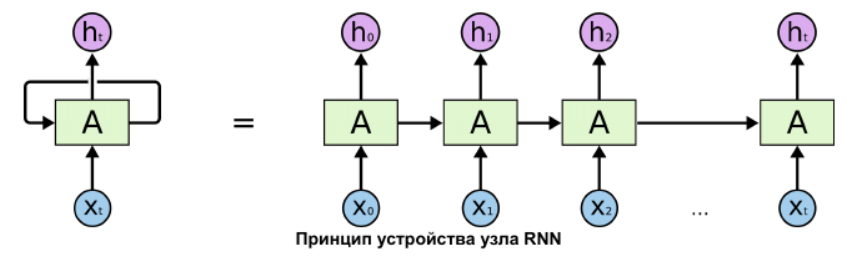

### Sequence-to-sequence модели 


Seq2Seq модели (Sequence-to-Sequence) — это класс глубоких нейронных сетей, которые используются для задач генерации последовательностей, таких как машинный перевод, генерация текста, вопросно-ответные системы и другие.

_Seq2seq_ состоит из двух рекуррентных нейронных сетей (RNN): __Энкодера__ и __Декодера__.

Это модели глубокого обучения, достигшие больших успехов в таких задачах, как машинный перевод, суммаризация текста, аннотация изображений и др. Так, например, в конце 2016 года подобная модель была встроена в Google Translate. 

<center>  <b>Базовая архитектура Seq2seq</b> <br/> </center>

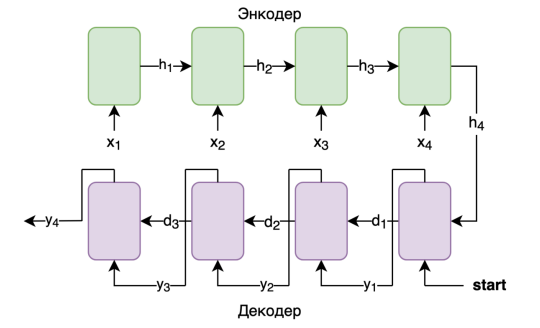

Энкодер - принимает последовательность (например: предложение на языке A) и сжимает
его в вектор скрытого состояния.

${x_i}$ - слова в предложении на языке A

${h_i}$ - скрытое состояние энкодера

блоки энкодера: получают на вход ${x_i}$ и передают скрытое состояние ${h_i}$ наследующую итерацию.



Декодер - выдает слово на языке B, принимает последнее скрытое состояние энкодера (для
первого слова) / предыдущее скрытое состояние декодера (последующие слова) и
предыдущее предсказанное слово.

${d_i}$ - скрытое состояние декодера

${y_i}$ - слова в предложении на языке B

Блоки декодера (фиолетовый) блоки декодера получающие на вход $y_{i-1}$ или
специальный токен `<start>` (в случае первой итерации) и возвращаюшие на
следующую итерацию:
  
$y_i$ - слова в предложении на языке B

$d_i$ - скрытое состояние декодера 

Перевод считается завершенным при возвращении $y_i$, равного специальному токену `<end>`

### Что такое Attention mechanism?

Attention mechanism — это интерфейс между кодером (энкодером) и декодером, который предоставляет декодеру информацию из каждого скрытого состояния кодера. Благодаря этой настройке модель может выборочно сосредоточиться на полезных частях входной последовательности и, следовательно, изучить согласованность между ними. Это помогает модели эффективно справляться с длинными входными предложениями.




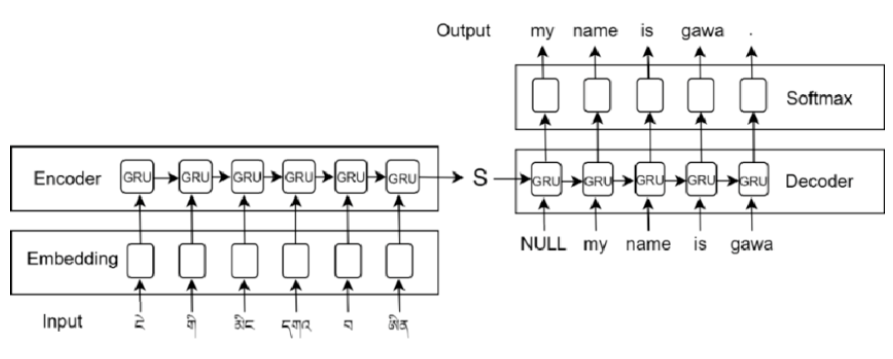

### Применение механизма внимания для Seq2seq: базовый принцип
Использование механизма внимания позволяет решать задачу нахождения закономерности
между словами находящимися на большом расстоянии друг от друга.

LSTM, GRU и аналогичные блоки используются для улучшения передачи информации на
большое количество итераций по сравнению с базовыми RNN.(Рекурентую ячейку GRU, я буду использовать далее для построения модели)

Несмотря на это сохраняется проблема: влияние предыдущих состояний на текущее уменьшается экспоненциально отрасстояния между словами

Механизм внимания улучшает этот показатель до линейного.

В классическом применении RNN результатом является только последнее скрытое
состояние ${h_m}$ , где - m длина последовательности входных данных.

Использование механизма внимания позволяет использовать информацию, полученную
не только из последнего скрытого состояния, но и из любого скрытого состояния ${h_t}$ для
любогоt  ∈ 1…m .

## 2) Провести анализ датасета и особенностей исходных данных. Предобработка данных.

In [179]:
import pandas as pd 
import tensorflow as tf

from sklearn.model_selection import train_test_split

import re
import numpy as np
import time
import string

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

In [139]:
file_path = 'data_rus_eng.txt'

In [140]:
lines = open(file_path, encoding='UTF-8').read().strip().split('\n')
lines = lines[:50000]
lines[:10]

['Go.\tМарш!\tCC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #1159202 (shanghainese)',
 'Go.\tИди.\tCC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #5898247 (marafon)',
 'Go.\tИдите.\tCC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #5898250 (marafon)',
 'Hi.\tЗдравствуйте.\tCC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #402127 (odexed)',
 'Hi.\tПривет!\tCC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #466968 (katjka)',
 'Hi.\tХай.\tCC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #467233 (timsa)',
 'Hi.\tЗдрасте.\tCC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #3803577 (marafon)',
 'Hi.\tЗдоро́во!\tCC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #3854188 (marafon)',
 'Run!\tБеги!\tCC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #1569978 (Biga)',
 'Run!\tБегите!\tCC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #2770234 (marafon)']

Из такого формата нам необходимо привести в такой формат

[['`<start>` предложение на английском `<end>`','`<start>` предложение на русском `<end>`' ],[...]]

In [141]:
print("Общее количество пар: ",len(lines))

Общее количество пар:  50000


In [142]:
exclude = set(string.punctuation)
exclude.add('«')
exclude.add('»')
#Знаки, которые будем удалять из предложений
print(*exclude)

$ - ? / # > ` + & . { * _ | " , < ) @ ^ ] ( } [ \ ; « : ~ » ! % = '


In [143]:
def preprocess_sentence(sent):
    sent = sent.lower()
    sent = ''.join(ch for ch in sent if ch not in exclude) # удаляем лишние знаки
    sent = sent.strip()
    sent = re.sub(" +", " ", sent) # убираем доп пробелы
    sent = '<start> ' + sent + ' <end>' # добавляем наши токены
    return sent


In [144]:
eng_mas = []
for line in lines:
    eng = line.rstrip().split('\t')[0]
    eng = preprocess_sentence(eng)
    eng_mas.append(eng)

In [145]:
eng_mas[:10]

['<start> go <end>',
 '<start> go <end>',
 '<start> go <end>',
 '<start> hi <end>',
 '<start> hi <end>',
 '<start> hi <end>',
 '<start> hi <end>',
 '<start> hi <end>',
 '<start> run <end>',
 '<start> run <end>']

In [146]:
rus_mas = []
for line in lines:
    rus = line.rstrip().split('\t')[1]
    rus = preprocess_sentence(rus)
    rus_mas.append(rus)

In [147]:
rus_mas[:10]

['<start> марш <end>',
 '<start> иди <end>',
 '<start> идите <end>',
 '<start> здравствуйте <end>',
 '<start> привет <end>',
 '<start> хай <end>',
 '<start> здрасте <end>',
 '<start> здоро́во <end>',
 '<start> беги <end>',
 '<start> бегите <end>']

In [148]:
# Теперь генерируем пары
sent_pairs = []
for line in lines:
    sent_pair = []
    eng = line.rstrip().split('\t')[0]
    rus = line.rstrip().split('\t')[1]
    eng = preprocess_sentence(eng)
    sent_pair.append(eng)
    rus = preprocess_sentence(rus)
    sent_pair.append(rus)
    sent_pairs.append(sent_pair)
sent_pairs[23000:23010]

[['<start> its dinner time <end>', '<start> время ужинать <end>'],
 ['<start> its dirt cheap <end>', '<start> он грошовый <end>'],
 ['<start> its dirt cheap <end>', '<start> она грошовая <end>'],
 ['<start> its dirt cheap <end>', '<start> оно грошовое <end>'],
 ['<start> its dirty work <end>', '<start> это грязная работа <end>'],
 ['<start> its disgusting <end>', '<start> это отвратительно <end>'],
 ['<start> its easy money <end>', '<start> это лёгкие деньги <end>'],
 ['<start> its fine today <end>', '<start> сегодня хороший день <end>'],
 ['<start> its flu season <end>', '<start> сейчас сезон гриппа <end>'],
 ['<start> its going fine <end>', '<start> всё идёт прекрасно <end>']]

Мы получили формат, который нам нужен

## 3) Провести индексацию и токенизацию данных. Предобработка данных.

Процесс перевода слов в числа называется индексацией. Каждому слову или токену в словаре присваивается уникальный числовой индекс.

In [149]:
# Класс, который создает пары СЛОВО <-> ИНДЕКС
# (например, "привет" <-> 3, то есть мы можем получить как и по индексу слово, так и наоборот)
class LanguageIndex():
    def __init__(self, lang):
        self.lang = lang
        self.word2idx = {}
        self.idx2word = {}
        self.vocab = set()
        self.create_index()

    def create_index(self):
        for phrase in self.lang:
            self.vocab.update(phrase.split(' '))
            
        self.vocab = sorted(self.vocab)
        self.word2idx['<pad>'] = 0 #Для паддинга, потому что индекс ноль будет незначимый(указал ниже)
        
        for index, word in enumerate(self.vocab):
            self.word2idx[word] = index + 1

        for word, index in self.word2idx.items():
            self.idx2word[index] = word

In [150]:
def max_length(mas):
    return max(len(t) for t in mas)

### Токенизация и паддинг

Токенизация - разбиение строки на подстроки, которые мы рассматриваем как интересующие нас
группы символов (токены).

пример токенизации двумя строчками выше

Паддинг (padding) - это процесс добавления нулей или других значений вокруг входных данных для обеспечения равной длины. Это часто используется в нейронных сетях для обработки последовательностей фиксированной длины.

In [151]:
def token_pad_dataset(pairs):
    inp_lang = LanguageIndex(en for en, ru in pairs)
    targ_lang = LanguageIndex(ru for en, ru in pairs)
    
    # Английские предложения
    input_tensor = [[inp_lang.word2idx[s] for s in en.split(' ')] for en, ru in pairs]
    
    # Русские предложения
    target_tensor = [[targ_lang.word2idx[s] for s in ru.split(' ')] for en, ru in pairs]
    
    max_length_inp, max_length_tar = max_length(input_tensor), max_length(target_tensor)

    # Паддинг
    input_tensor = tf.keras.preprocessing.sequence.pad_sequences(input_tensor, 
                                                                 maxlen=max_length_inp, # Сравниваем всё к максимальной длине
                                                                 padding='post') # Добавление 0 в конец

    target_tensor = tf.keras.preprocessing.sequence.pad_sequences(target_tensor, 
                                                                  maxlen=max_length_tar, 
                                                                  padding='post')
    
    return input_tensor, target_tensor, inp_lang, targ_lang, max_length_inp, max_length_tar

Пример токенизации, паддинга и класса LanguageIndex

In [152]:
mas = [['<start> its dinner time <end>', '<start> время ужинать <end>'],
       ['<start> its dirt cheap <end>', '<start> он грошовый <end>'],
       ['<start> go <end>','<start> марш <end>']]

In [153]:
langindex_ex = LanguageIndex(en for en,ru in mas)

Токенизация (Разбили строки на подстроки)

In [154]:
[en.split(' ') for en,ru in mas] 

[['<start>', 'its', 'dinner', 'time', '<end>'],
 ['<start>', 'its', 'dirt', 'cheap', '<end>'],
 ['<start>', 'go', '<end>']]

In [155]:
test = [[langindex_ex.word2idx[s] for s in en.split(' ')] for en, ru in mas]
test

[[2, 7, 4, 8, 1], [2, 7, 5, 3, 1], [2, 6, 1]]

Паддинг (Добавили незначащие нули для обеспечения равной длины)

In [156]:
max_len = max_length(test)

In [157]:
test = tf.keras.preprocessing.sequence.pad_sequences(test, 
                                                     maxlen=max_len,
                                                     padding='post')
test

array([[2, 7, 4, 8, 1],
       [2, 7, 5, 3, 1],
       [2, 6, 1, 0, 0]])

Получим наш преобразованный окончательный датасет в переменные 

In [158]:
input_tensor, target_tensor, inp_lang, targ_lang, max_length_inp, max_length_targ = token_pad_dataset(sent_pairs)

Разобьем данные на две части:
    
    обучающий набор данных, который используется для обучения модели(80%)
    
    валидационный набор данных, который используется для проверки предсказательной способности модели(20%)
    
Это помогает определить, насколько хорошо модель обобщает данные, которые она не видела в процессе обучения, и позволяет отслеживать переобучение модели.

In [159]:
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.1, random_state = 101)


len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val)

(45000, 45000, 5000, 5000)

## 4) Разработка и реализация модели машинного перевода с использованием TensorFlow/Keras.

In [167]:
BUFFER_SIZE = len(input_tensor_train) # размер буфера для перемешивания данных. 
BATCH_SIZE = 64 # в каждой итерации обучения модель будет обрабатывать 64 образца данных одновременно.
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE # количество шагов обучения в каждой эпохе.
embedding_dim = 256 #каждое слово будет представлено в виде вектора размерности 256.
units = 1024 # количество нейронов в скрытом слое модели.
vocab_inp_size = len(inp_lang.word2idx)
vocab_tar_size = len(targ_lang.word2idx)

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

Рекуррентная ячейка GRU (Gated Recurrent Unit) - это модифицированная архитектура
рекуррентных нейронных сетей, разработанная для решения проблем, связанных с затуханием и
взрывающимся градиентом, и для обработки последовательных данных с долгосрочными
зависимостями. GRU представляет собой компромисс между стандартными RNN и более
сложными LSTM, обеспечивая хорошую производительность в задачах, связанных с
последовательными данными и долгосрочными зависимостями, имея существенно меньше
параметров чем LSTM.


In [161]:
def gru(units):
    return tf.keras.layers.GRU(units, 
                               return_sequences=True, # Говорит о том, что надо ли возвращать последний вывод в выходной последовательности или всю последовательность. 
                               return_state=True, # Говорит о том, что надо ли возвращать последнее состояние в дополнение к выводу. 
                               recurrent_activation='sigmoid', 
                               recurrent_initializer='glorot_uniform')

### Следующим шагом является определение кодера и декодера. 

Входными данными для encoder будет предложение на английском языке, а выходными — скрытое состояние и состояние ячейки GRU.

In [162]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim) 
        # это слой эмбеддинга, который преобразует входные индексы слов в их векторные представления.
        self.gru = gru(self.enc_units)
        # это слой GRU (Gated Recurrent Unit), 
        # который будет принимать векторные представления слов и выдавать скрытые состояния и выходы.
        
    def call(self, x, hidden):
        '''
        Преобразует входные индексы слов в их векторные представления с помощью слоя эмбеддинга.
        Передает векторные представления слов через слой GRU кодировщика.
        Возвращает выходные данные (output) и скрытое состояние (state).
           '''
        x = self.embedding(x)
        output, state = self.gru(x, initial_state = hidden)        
        return output, state
    
    
    def initialize_hidden_state(self):
        '''
        Этот метод возвращает тензор из нулей размера (размер пакета, количество нейронов в GRU слое кодировщика). 
        Начальное скрытое состояние используется при первом временном шаге при передаче последовательности слов через кодировщик.
        '''
        return tf.zeros((self.batch_sz, self.enc_units))

Декодер будет иметь два входа: скрытое состояние и состояние ячейки от кодера, а также входное предложение, которое на самом деле будет выходным предложением с добавленным в начале токеном.

In [163]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        # это слой эмбеддинга, который преобразует входные индексы слов в их векторные представления.
        self.gru = gru(self.dec_units)
        # это слой GRU (Gated Recurrent Unit), 
        # который будет принимать векторные представления слов и выдавать скрытые состояния и выходы.
        self.fc = tf.keras.layers.Dense(vocab_size) # это слой, который преобразует выход GRU в прогнозы для каждого слова в словаре.
        
        self.W1 = tf.keras.layers.Dense(self.dec_units)
        self.W2 = tf.keras.layers.Dense(self.dec_units)
        self.V = tf.keras.layers.Dense(1)
        # это слои, используемые для реализации механизма внимания (attention). 
        
    def call(self, x, hidden, enc_output):
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
        
        score = self.V(tf.nn.tanh(self.W1(enc_output) + self.W2(hidden_with_time_axis)))
        # Выходом данного слоя будет является вектор score 
        # score - оценки на основании которых на скрытое состояние будет "обращено внимание"
        attention_weights = tf.nn.softmax(score, axis=1)
        # Для нормализации значений используется softmax
        
        context_vector = attention_weights * enc_output
        context_vector = tf.reduce_sum(context_vector, axis=1)
        # Результатом работы слоя внимания является context vector который, содержит в себе
        # информацию обо всех скрытых состояниях h_i
        
        x = self.embedding(x)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
        
        output, state = self.gru(x)
        output = tf.reshape(output, (-1, output.shape[2]))
        x = self.fc(output)
        # Возвращает выходные данные, скрытое состояние и веса внимания.
        return x, state, attention_weights
        
    def initialize_hidden_state(self):
        '''
        Этот метод возвращает тензор из нулей размера (размер пакета, количество нейронов в GRU слое декодера). 
        Начальное скрытое состояние используется при первом временном шаге при передаче последовательности слов через декодер.
        '''
        return tf.zeros((self.batch_sz, self.dec_units))

In [164]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

### Определим оптимизатор и функцию потерь. 

In [165]:
optimizer = tf.optimizers.Adam() # оптимизатор, который будет использоваться для обновления весов модели в процессе обучения.

def loss_function(real, pred):
    mask = 1 - np.equal(real, 0)
    loss_ = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=real, logits=pred) * mask
    return tf.reduce_mean(loss_)

Кросс-энтропийная функция потерь (cross-entropy loss) - это функция потерь, которая часто используется в задачах классификации, когда модель должна предсказать вероятности принадлежности объектов к различным классам.

В задаче машинного перевода, как и в других задачах генерации последовательностей, каждое слово в целевой последовательности представляется в виде одного из возможных токенов (слов или символов). Каждый токен имеет свой индекс в словаре. Модель должна предсказать вероятности для всех возможных токенов на каждом временном шаге.

Однако, в обучающих данных у нас присутствовуют пустые токены, которые представляют собой заполнители (padding), добавленные для выравнивания длины последовательностей. Эти токены не должны учитываться при вычислении потерь, так как они не являются частью реальной последовательности.

Для учета этого в функции loss_function используется маска, которая устанавливает нулевое значение для пустых токенов и единицу для всех остальных токенов.

Таким образом, вычисление кросс-энтропийной функции потерь с учетом маски позволяет модели учитывать только те токены, которые действительно присутствуют в целевой последовательности.

## 5) Обучение модели.

In [175]:
EPOCHS = 10

for epoch in range(EPOCHS):
    start = time.time()
    
    hidden = encoder.initialize_hidden_state()
    total_loss = 0
    total_accuracy = 0
    
    for (batch, (inp, targ)) in enumerate(dataset):
        loss = 0
        accuracy = 0
        # Обучение с учителем
        with tf.GradientTape() as tape:
            enc_output, enc_hidden = encoder(inp, hidden)
            dec_hidden = enc_hidden
            dec_input = tf.expand_dims([targ_lang.word2idx['<start>']] * BATCH_SIZE, 1)       
            
            for t in range(1, targ.shape[1]):
                predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)
                
                # Вычисление метрик
                loss += loss_function(targ[:, t], predictions)
                predicted_id = tf.argmax(predictions, axis=-1)
                predicted_id = tf.cast(predicted_id, tf.int64)
                targ = tf.cast(targ, tf.int64) 
                accuracy += tf.reduce_mean(tf.cast(tf.equal(predicted_id, targ[:, t]), dtype=tf.float32))
                #вычисляет точность для текущего временного шага путем сравнения предсказанных индексов с реальными значениями и вычисления среднего значения. 
                #Если предсказанный индекс совпадает с реальным значением, то это значение будет равно 1, иначе 0.
                dec_input = tf.expand_dims(targ[:, t], 1)
        
        batch_loss = (loss / int(targ.shape[1]))
        batch_accuracy = (accuracy / int(targ.shape[1]))
        
        total_loss += batch_loss
        total_accuracy += batch_accuracy
        
        variables = encoder.variables + decoder.variables
        gradients = tape.gradient(loss, variables)
        optimizer.apply_gradients(zip(gradients, variables))
        
        if batch % 100 == 0:
            print('Epoch {} Batch {} Loss {:.4f} Accuracy {:.4f}'.format(epoch + 1,
                                                                         batch,
                                                                         batch_loss.numpy(),
                                                                         batch_accuracy.numpy()))

    
    print('Epoch {} Loss {:.4f} Accuracy {:.4f}'.format(epoch + 1,
                                                         total_loss / BATCH_SIZE,
                                                         total_accuracy / BATCH_SIZE))
    print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))


Epoch 1 Batch 0 Loss 0.5684 Accuracy 0.2148
Epoch 1 Batch 100 Loss 0.5423 Accuracy 0.2279
Epoch 1 Batch 200 Loss 0.5866 Accuracy 0.2044
Epoch 1 Batch 300 Loss 0.4952 Accuracy 0.2240
Epoch 1 Batch 400 Loss 0.5313 Accuracy 0.2396
Epoch 1 Batch 500 Loss 0.4671 Accuracy 0.2227
Epoch 1 Batch 600 Loss 0.5424 Accuracy 0.2201
Epoch 1 Batch 700 Loss 0.6217 Accuracy 0.2122
Epoch 1 Loss 6.0856 Accuracy 2.4303
Time taken for 1 epoch 1661.7432191371918 sec

Epoch 2 Batch 0 Loss 0.3107 Accuracy 0.2565
Epoch 2 Batch 100 Loss 0.2970 Accuracy 0.2474
Epoch 2 Batch 200 Loss 0.3906 Accuracy 0.2331
Epoch 2 Batch 300 Loss 0.3427 Accuracy 0.2344
Epoch 2 Batch 400 Loss 0.3370 Accuracy 0.2396
Epoch 2 Batch 500 Loss 0.4174 Accuracy 0.2708
Epoch 2 Batch 600 Loss 0.3376 Accuracy 0.2578
Epoch 2 Batch 700 Loss 0.3609 Accuracy 0.2474
Epoch 2 Loss 4.0993 Accuracy 2.6826
Time taken for 1 epoch 1615.4051389694214 sec

Epoch 3 Batch 0 Loss 0.2257 Accuracy 0.2591
Epoch 3 Batch 100 Loss 0.2334 Accuracy 0.2591
Epoch 3 Batc

Accuracy - представляет собой сумму правильных предсказаний модели.

Вычисляет точность для текущего временного шага путем сравнения предсказанных индексов с реальными значениями и вычисления среднего значения. 
Если предсказанный индекс совпадает с реальным значением, то это значение будет равно 1, иначе 0.

То есть, мы сравниваем индексы нашего предсказанного предложения с правильным переводом.

Рассмотрим на примерах:

### **1 пример**

predicted translation: он хочет спать - [13,235,799] это пример индексов каждого слова 

actual translation: он хочет спать - [13,235,799]

нам вернется [True, True, True] - 3/3 = 1

---------------------------------------------------

### **2 пример**

predicted translation: он хочет петь - [13,235,569] это пример индексов каждого слова 

actual translation: он хочет спать - [13,235,799]

нам вернется [True, True, False] - 2/3 = 0.6667

**В конце мы делим их сумму на количество предложений, в нашем случае 1.6667/2 = 0.833**

---------------------------------------------------

Но есть нюансы, например, предложение:

predicted translation: в автобусе было пусто

actual translation: автобус был пустой

Предложения имеют один смысл, но порядок и формы слов немного другие, поэтому accuracy у нашей модели низкий.

In [269]:
def get_translate(inputs, encoder, decoder, inp_lang, targ_lang, max_length_inp, max_length_targ):
    
    attention_plot = np.zeros((max_length_targ, max_length_inp)) # инициализируется нулями для сохранения весов внимания.
    sentence = ''
    for i in inputs[0]:
        if i == 0:
            break
        sentence = sentence + inp_lang.idx2word[i] + ' '
    sentence = sentence[:-1]
    
    inputs = tf.convert_to_tensor(inputs)
    
    result = ''

    hidden = [tf.zeros((1, units))]
    enc_out, enc_hidden = encoder(inputs, hidden)

    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([targ_lang.word2idx['<start>']], 0)

    for t in range(max_length_targ):
        predictions, dec_hidden, attention_weights = decoder(dec_input, dec_hidden, enc_out)
        #Для каждого временного шага модель генерирует предсказание predictions и новое скрытое состояние dec_hidden с использованием декодера.
        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention_plot[t] = attention_weights.numpy()# Веса внимания сохраняются

        predicted_id = tf.argmax(predictions[0]).numpy()

        result += targ_lang.idx2word[predicted_id] + ' '

        if targ_lang.idx2word[predicted_id] == '<end>':
            return result, sentence, attention_plot

        
        dec_input = tf.expand_dims([predicted_id], 0)
        #функция завершается и возвращает результат, входную последовательность и веса внимания.
    return result, sentence, attention_plot


## 6) Проверка предсказаний,анализ результатов и выводы о применимости разработанной модели.

In [270]:
def predict_random_val_sentence():
    actual_sent = ''
    k = np.random.randint(len(input_tensor_val))
    random_input = input_tensor_val[k]
    random_output = target_tensor_val[k]
    random_input = np.expand_dims(random_input,0)
    result, sentence, attention_plot = get_translate(random_input, encoder, decoder, inp_lang, targ_lang, max_length_inp, max_length_targ)
    print('Input: {}'.format(sentence[8:-6]))
    print('Predicted translation: {}'.format(result[:-6]))
    for i in random_output:
        if i == 0:
            break
        actual_sent = actual_sent + targ_lang.idx2word[i] + ' '
    actual_sent = actual_sent[8:-7]
    print('Actual translation: {}'.format(actual_sent))
    attention_plot = attention_plot[:len(result.split(' '))-2, 1:len(sentence.split(' '))-1]
    sentence, result = sentence.split(' '), result.split(' ')
    sentence = sentence[1:-1]
    result = result[:-2]

In [271]:
def translate_sentence(sentence):
    sentence = preprocess_sentence(sentence)

    inputs = [inp_lang.word2idx[i] for i in sentence.split(' ')]
    inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                           maxlen=max_length_inp,
                                                           padding='post')
    
    print(inputs)
    result, sentence, _ = get_translate(inputs, encoder, decoder, inp_lang, targ_lang, max_length_inp, max_length_targ)
    
    print('Input: {}'.format(sentence))
    print('Predicted translation: {}'.format(result))

# Пример использования
translate_sentence('Can we swim here')


[[  50  683 4684 4189 2004   49    0    0]]
Input: <start> can we swim here <end>
Predicted translation: мы можем здесь поплавать <end> 


In [274]:
for i in range(20):
    predict_random_val_sentence()
    print('---------------------------------')

Input: love hurts
Predicted translation: любовь причиняет боль 
Actual translation: любовь зла
---------------------------------
Input: we will finish it
Predicted translation: мы ей спрячем 
Actual translation: мы его закончим
---------------------------------
Input: i like honey
Predicted translation: я люблю тишину 
Actual translation: я люблю мёд
---------------------------------
Input: i made it on time
Predicted translation: я сделал это времени 
Actual translation: я успел вовремя
---------------------------------
Input: i slept very well
Predicted translation: я очень хорошо спала 
Actual translation: я спал очень хорошо
---------------------------------
Input: grab tom
Predicted translation: хватай тома 
Actual translation: схвати тома
---------------------------------
Input: i was injured
Predicted translation: я был ранен 
Actual translation: я была ранена
---------------------------------
Input: tom lies
Predicted translation: том лжет 
Actual translation: том врёт
--------

## Вывод

В данной работе была реализована seq2seq модель с механизмом внимания для задачи машинного перевода. Использование механизма внимания позволяет модели фокусироваться на наиболее важных частях входной последовательности при генерации выходной последовательности, что значительно улучшает качество перевода.

### Основные результаты:

1. **Реализация модели:**
   - Была разработана и реализована seq2seq модель с механизмом внимания с использованием TensorFlow.
   - Модель состоит из кодера и декодера на основе рекуррентных нейронных сетей.
   - Для обучения модели использовался алгоритм оптимизации Adam и функция потерь - перекрестная энтропия.

2. **Обучение модели:**
   - Модель была обучена на параллельном корпусе текстовых данных входных и целевых предложений.

3. **Оценка качества:**
   - Качество модели оценивалось на отложенной выборке с помощью метрики accuracy.

### Выводы:
   - Предложенная seq2seq модель с механизмом внимания показала хорошие результаты в задаче машинного перевода для используемого датасета, но для слов, которых не было в датасете, будет выдавать плохой перевод.
   - Использование механизма внимания позволяет улучшить качество перевода, особенно для длинных последовательностей.
   - Дальнейшие исследования могут быть направлены на улучшение архитектуры модели и ее обучения на больших объемах данных для достижения еще более высоких результатов.


## 7) Список использованных источников.

1) https://www.tensorflow.org/text/tutorials/transformer?hl=ru

2) https://neerc.ifmo.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%85%D0%B0%D0%BD%D0%B8%D0%B7%D0%BC_%D0%B2%D0%BD%D0%B8%D0%BC%D0%B0%D0%BD%D0%B8%D1%8F

3) https://edumunozsala.github.io/BlogEms/fastpages/jupyter/encoder-decoder/lstm/attention/tensorflow%202/2020/10/07/Intro-seq2seq-Encoder-Decoder-ENG-SPA-translator-tf2.html

4) https://www.tensorflow.org/text/tutorials/text_generation?hl=ru

5) https://habr.com/ru/articles/486158/

6) https://www.tensorflow.org

7) https://keras.io/guides/functional_api/

8) https://www.manythings.org/anki/ - датасет